<div style="background:#FFFFFF">
<img src="logo.jpg" width=150 ALIGN="left" style='margin-right:10px; border-style: solid; border-width: 2px;' alt='logo'>
<h1>Starting Kit - Bee vs Wasp </h1>
<p>
This starting kit will guide you step by step and will walk you through the data statistics and<br>
examples. This will give you a clear idea of what this challenge is about and how you can<br>
proceed further to solve the challenge.
</p>

<br><br>
<p>
This code was tested with Python 3.8.5 |Anaconda custom (64-bit)| (default, Dec 23 2020, 21:19:02) (https://anaconda.org/)<br>
</p>
    
<p>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</p>

<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>
    <p>
This challenge was organized by <b>Team Ecologists</b> of <b><a style='color:#4D6605;' href='http://www.chalearn.org/'>ChaLearn</a></b>  at <b><a style='color: #62023C;' href='https://www.universite-paris-saclay.fr/'>Université Paris Saclay</a></b>
</p>
</div>

<hr style='background-color: #D3D3D3; height: 1px; border: 0;'>

<div style="background:#FFFFFF">
<h2>Introduction </h2>


This challenge uses a Dataset from <b>MUSÉUM NATIONAL D’HISTOIRE NATURELLE</b>


The dataset coniststs of total <b>240,000</b> images and each image belongs to one of the following classes
<ol>
    <li>Bee</li>
    <li>Wasp</li>
    <li>Other insect</li>
    <li>Butterfly insect</li>  
    <li>Other</li>
</ol>
    
This challenge is about creating a Machine Learning model and train it with the data provided to classify the images into the mentioned 5 categories.


References and credits:
<ul>
    <li><a style='color:#000000;' href='https://www.mnhn.fr/'>MUSÉUM NATIONAL D’HISTOIRE NATURELLE</a></li>
    <li><a style='color:#CC0333;' href='https://www.spipoll.org/'>SPIPOLL</a></li>
    <li><a style='color: #62023C;' href='https://www.universite-paris-saclay.fr/'>Université Paris Saclay</a></li>
    <li><a style='color:#4D6605;' href='http://www.chalearn.org/'>ChaLearn</a></li>
</ul>
</div>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
model_dir = 'sample_code_submission/' # Change the model to a better one once you have one!
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
import seaborn as sns; sns.set()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
%reload_ext autoreload

***
# Step 1: Exploratory data analysis
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.

The public_data has a limited amount of examples which may not be enought to train your model. If you have a good processing resource and you need a big dataset then you can download it from : **LINK_TO_BIG_TRAIN_DATA**

The data used for this challenge has images resized into 128x128 pixels.

In [4]:
data_name = 'deep_pollination' # Do not change
data_dir = '../deep_pollination_public_data' # Change it to point to the directory with public_data
# !ls $data_dir*

For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data.

**Install pre-requisites for image reading**

Uncomment the next line

In [5]:
#!pip install scikit-image

In [6]:
from data_io import read_images
data = read_images(data_dir)

------------------------------------
Reading File Names
------------------------------------

Number of images : 10000

Train Images: 10000

Validation Images: 0

Test Images: 0


------------------------------------
Reading Label Names
------------------------------------

Class Names :  ['bee' 'butterfly' 'insect' 'other' 'wasp']

------------------------------------
Reading Images
------------------------------------


Reading Train Images

Train Images Read:  10000



Data prepration successfully!


In [7]:
#Keys in the Data
for key, value in data.items():
    print("Key: "+key+" ---> Value type: ",type(value))

Key: classes ---> Value type:  <class 'numpy.ndarray'>
Key: number_of_images_per_class ---> Value type:  <class 'numpy.ndarray'>
Key: has_train ---> Value type:  <class 'bool'>
Key: X_train ---> Value type:  <class 'numpy.ndarray'>
Key: Y_train ---> Value type:  <class 'numpy.ndarray'>
Key: has_valid ---> Value type:  <class 'bool'>
Key: has_test ---> Value type:  <class 'bool'>


**Distribution of Classes/Labels**

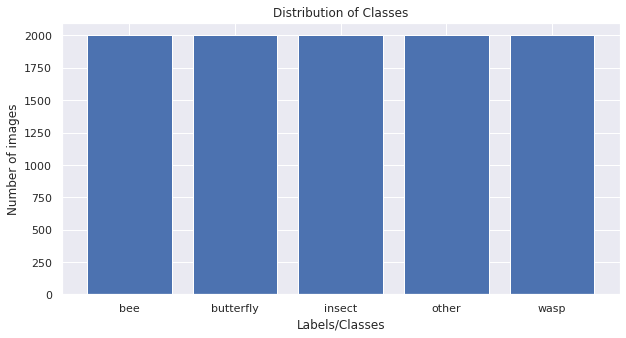

In [8]:
plt.figure(figsize=(10, 5))
plt.bar(data['classes'], data['number_of_images_per_class'])
plt.xlabel("Labels/Classes")
plt.ylabel("Number of images")
plt.title("Distribution of Classes");

### Visualization

**Visualizing the 6 images to get an overview of the images**

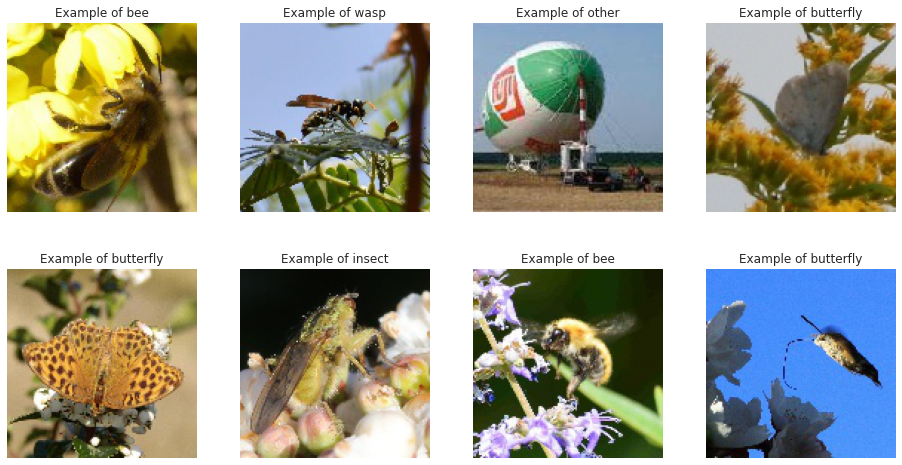

In [9]:
number_of_images_to_show = 8

index = np.random.choice(len(data["X_train"]), 8, replace=False)  
images = data["X_train"][index]
labels = data["Y_train"][index]
      

# images = data.sample(8)
fig, _axs = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
fig.subplots_adjust(hspace=0.3)
axs = _axs.flatten()


for i in range(number_of_images_to_show):
    img = images[i].reshape(128,128,3)
    label = data["classes"][labels[i]]
    #img = images.iloc[[i]].drop(['target','subset'], axis=1).values.reshape(128,128,3)
    #label = images['target'].values[i]
    axs[i].set_title('Example of {}'.format(label))
    axs[i].imshow(img)
    axs[i].set_axis_off()

plt.show()

**Visulizing mean of RGB component of each class**

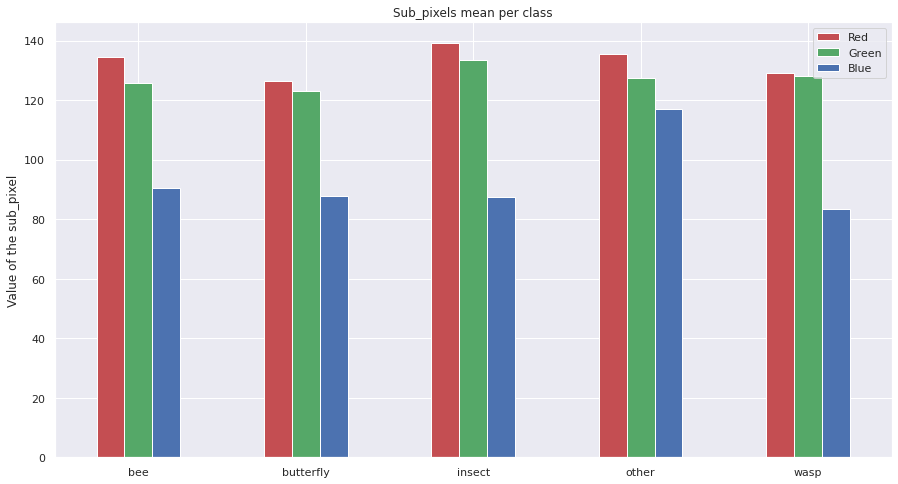

In [10]:
#Our picture have a resolution of 128x128
resolution = 128*128

#The pictures and labels
images = data["X_train"]
labels = data["Y_train"]

#Name of the classes
names = data["classes"]
#The array that will record the means :3 for the pixels and 3 to count the number of images in the class
remember_all = np.zeros((5,4))

for cpt_image, image in enumerate(images):
    #Update the number of pictures
    remember_all[labels[cpt_image]][0] += np.mean(image[0::3])
    remember_all[labels[cpt_image]][1] += np.mean(image[1::3])
    remember_all[labels[cpt_image]][2] += np.mean(image[2::3])
    remember_all[labels[cpt_image]][3]+=1

for i in range(5):
    #Do the mean for all pictures
    remember_all[i][0]/=remember_all[i][3]
    remember_all[i][1]/=remember_all[i][3]
    remember_all[i][2]/=remember_all[i][3]
        
mean_colors = pd.DataFrame(index=names, data=remember_all[:,:3], columns=["Red", "Green", "Blue"])
mean_colors.plot(kind="bar", color=['r','g','b'], title='Sub_pixels mean per class', figsize=(15,8))
plt.ylabel('Value of the sub_pixel')
plt.xticks(rotation=0)
plt.show()

***
# Step 2: Building a predictive model
We reload the data with the AutoML DataManager class because this is more convenient:

## Training a predictive model
We provide an example of predictive model in the `sample_code_submission/` directory. 
You can change this model and use a better one to get a good score for the challenge


**Install pre-requisites for using the model from Keras**

Uncomment the next line

In [11]:
# !pip install --user --upgrade tensorflow
# !pip install keras

In [12]:
from data_io import write
from model import model

Using TensorFlow backend.


In [13]:
import tensorflow as tf

In [14]:
#!pip install --user --upgrade tensorflow

<div style="background:#FFF">
an instance of the model (run the constructor) and attempt to reload a previously saved version from `sample_code_submission/`:
</div>

In [15]:
myModel = model()
trained_model_name = model_dir + data_name
# Uncomment the next line to re-load an already trained model
#myModel = myModel.load(trained_model_name) 

Model: <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f87be86e668>


<div style="background:#FFF">
    Train the model (unless you reloaded a trained model) and make predictions. 
</div>

In [16]:
if not(myModel.is_trained):
    myModel.fit(data["X_train"], data["Y_train"])                     

Y_hat_train = myModel.predict(data["X_train"]) # Optional, not really needed to test on taining examples

if data["has_valid"]:
    Y_hat_valid = myModel.predict(data["X_valid"])

if data["has_test"]:
    Y_hat_test = myModel.predict(data["X_test"])

FIT: dim(X)= [10000, 49152]
FIT: dim(y)= [10000, 1]
Epoch 1/10
80/80 [==============================] - 158s 2s/step - loss: 1.4508 - accuracy: 0.4145 - val_loss: 1.6042 - val_accuracy: 0.4100
Epoch 2/10
80/80 [==============================] - 155s 2s/step - loss: 0.9800 - accuracy: 0.6112 - val_loss: 1.1644 - val_accuracy: 0.5390
Epoch 3/10
80/80 [==============================] - 155s 2s/step - loss: 0.7505 - accuracy: 0.7190 - val_loss: 1.0081 - val_accuracy: 0.5900
Epoch 4/10
80/80 [==============================] - 155s 2s/step - loss: 0.4590 - accuracy: 0.8497 - val_loss: 1.2838 - val_accuracy: 0.5610
Epoch 5/10
80/80 [==============================] - 155s 2s/step - loss: 0.1955 - accuracy: 0.9532 - val_loss: 1.4927 - val_accuracy: 0.5320
Epoch 6/10
80/80 [==============================] - 155s 2s/step - loss: 0.0592 - accuracy: 0.9935 - val_loss: 1.4463 - val_accuracy: 0.6000
Epoch 7/10
80/80 [==============================] - 155s 2s/step - loss: 0.0148 - accuracy: 1.0000 - v

**Save the trained model** (will be ready to reload next time around) and save the prediction results. <br>

In [17]:
myModel.save(trained_model_name)    

Model Saved : sample_code_submission/deep_pollination_model.h5


**IMPORTANT:** if you save the trained model, it will be bundled with your sample code submission. Therefore your model will NOT be retrained on the challenge platform. Remove the pickle from the submission if you want the model to be retrained on the platform.

**REQUIRED:** Trained model is required in the submission to codalab. 

In [18]:
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)

if data["has_valid"]:
    write(result_name + '_valid.predict', Y_hat_valid)

if data["has_test"]:
    write(result_name + '_test.predict', Y_hat_test)

!ls $result_name*

sample_result_submission/deep_pollination_test.predict
sample_result_submission/deep_pollination_train.predict
sample_result_submission/deep_pollination_valid.predict


## Transfer Learning

In [47]:
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.applications import VGG19 #For Transfer Learning
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras.utils import to_categorical

In [85]:
IMG_SIZE = (128,128)

In [86]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet',)

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(data["X_train"], data["Y_train"], test_size=0.33, random_state=42)

In [110]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train.reshape((X_train.shape[0],)+IMG_SHAPE), y_train))
validation_dataset = tf.data.Dataset.from_tensor_slices((X_valid.reshape((X_valid.shape[0],)+IMG_SHAPE), y_valid))

In [111]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_dataset = validation_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)

In [113]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

In [114]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(64, 4, 4, 1280)


In [115]:
base_model.trainable = False

In [116]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         input_14[0][0]                   
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 64, 64, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [117]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(64, 1280)


In [118]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(64, 1)


In [119]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [120]:
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

In [121]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [122]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [123]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [124]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 128, 128, 3)]     0         
_________________________________________________________________
sequential_9 (Sequential)    (None, 128, 128, 3)       0         
_________________________________________________________________
tf.math.truediv_5 (TFOpLambd (None, 128, 128, 3)       0         
_________________________________________________________________
tf.math.subtract_5 (TFOpLamb (None, 128, 128, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_128 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1280)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1280)              0   

In [125]:
len(model.trainable_variables)

2

In [126]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

52/52 [==============================] - 10s 177ms/step - loss: 2.3844e-07 - accuracy: 0.2211


In [127]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.00
initial accuracy: 0.21


In [128]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
105/105 [==============================] - 32s 287ms/step - loss: 2.3970e-07 - accuracy: 0.2149 - val_loss: 2.3582e-07 - val_accuracy: 0.2106
Epoch 2/10
105/105 [==============================] - 30s 287ms/step - loss: 2.3970e-07 - accuracy: 0.2119 - val_loss: 2.3582e-07 - val_accuracy: 0.2106
Epoch 3/10
105/105 [==============================] - 30s 287ms/step - loss: 2.3970e-07 - accuracy: 0.2157 - val_loss: 2.3582e-07 - val_accuracy: 0.2106
Epoch 4/10
105/105 [==============================] - 30s 286ms/step - loss: 2.3970e-07 - accuracy: 0.2076 - val_loss: 2.3582e-07 - val_accuracy: 0.2106
Epoch 5/10
105/105 [==============================] - 30s 286ms/step - loss: 2.3970e-07 - accuracy: 0.2119 - val_loss: 2.3582e-07 - val_accuracy: 0.2106
Epoch 6/10
105/105 [==============================] - 30s 286ms/step - loss: 2.3970e-07 - accuracy: 0.2149 - val_loss: 2.3582e-07 - val_accuracy: 0.2106
Epoch 7/10
105/105 [==============================] - 30s 288ms/step - loss: 2.397

## Scoring the results
### Load the challenge metric

**The metric chosen for your challenge** is identified in the "metric.txt" file found in the `scoring_program/` directory.
<br> 
The function "get_metric" searches first for a metric having that name in my_metric.py, then in libscores.py, then in sklearn.metric.


In [19]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)
# Uncomment the next line to display the code of the scoring metric
#??scoring_function

Using scoring metric: accuracy


## Training performance

In [20]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(data["Y_train"], Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(data["Y_train"], data["Y_train"]))

if data["has_valid"]:
    print('Validation score for the', metric_name, 'metric = %5.4f' % scoring_function(data["Y_valid"], Y_hat_valid))
if data["has_test"]:
    print('Test score for the', metric_name, 'metric = %5.4f' % scoring_function(data["Y_test"], Y_hat_test))

Training score for the accuracy metric = 0.9231
Ideal score for the accuracy metric = 1.0000


You can add here other scores and result visualization.

## Confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(data["Y_train"], Y_hat_train)

In [22]:
confusion_matrix

array([[1767,   48,  110,   21,   54],
       [  32, 1876,   51,   23,   18],
       [  89,   52, 1790,   17,   52],
       [  14,   31,   21, 1929,    5],
       [  39,   23,   62,    7, 1869]])

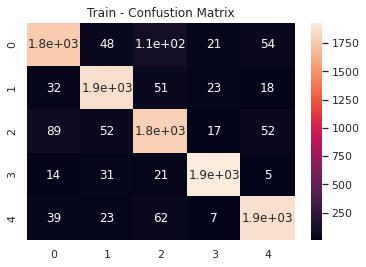

In [23]:
df_cm = pd.DataFrame(confusion_matrix, range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1]))
sns.heatmap(df_cm, annot=True)
plt.title("Train - Confustion Matrix")
plt.show()

## Cross-validation performance

CV scores on sample_data doesn't have enough data, and so isn't meaningful.
Run it with the full data to see meaningful values.

In [24]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scores = cross_val_score(myModel, data["X_train"], data["Y_train"], cv=3, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

Model: <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f876d20c208>
FIT: dim(X)= [6666, 49152]
FIT: dim(y)= [6666, 1]
Epoch 1/10
54/54 [==============================] - 106s 2s/step - loss: 1.4968 - accuracy: 0.3737 - val_loss: 4.8480 - val_accuracy: 0.2046
Epoch 2/10
54/54 [==============================] - 104s 2s/step - loss: 1.0561 - accuracy: 0.5813 - val_loss: 1.5335 - val_accuracy: 0.4213
Epoch 3/10
54/54 [==============================] - 104s 2s/step - loss: 0.8178 - accuracy: 0.6940 - val_loss: 1.7164 - val_accuracy: 0.3928
Epoch 4/10
54/54 [==============================] - 104s 2s/step - loss: 0.4946 - accuracy: 0.8366 - val_loss: 1.2621 - val_accuracy: 0.5142
Epoch 5/10
54/54 [==============================] - 104s 2s/step - loss: 0.2065 - accuracy: 0.9553 - val_loss: 1.6844 - val_accuracy: 0.4535
Epoch 6/10
54/54 [==============================] - 104s 2s/step - loss: 0.0675 - accuracy: 0.9916 - val_loss: 1.3467 - val_accuracy: 0.5165
Epoch 7/10
54/54 

***
# Step 3: Making a submission

## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.<br>

<code>python3</code> is required for this step

In [25]:
#!source activate python3; python $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

### Test scoring program

In [26]:
scoring_output_dir = 'scoring_output'
#!source activate python3; python $score_dir/score.py $data_dir $result_dir $scoring_output_dir

# Prepare the submission

In [27]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + '.zip'
sample_result_submission = '../sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
../sample_code_submission_21-04-07-22-05.zip
../sample_result_submission_21-04-07-22-05.zip
